## Step - 1 - Introduction -> Give a detailed data description and objective

#### Adult income prediction

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US Census database. In our first section, we explore the data at face value in order to understand the trends and representations of certain demographics in the corpus. We then use this information in section two to form models to predict whether an individual made more or less than $50,000 in 1994. In the third section, we look into a couple papers written on the dataset to find out what methods they are using to gain insight on the same data. Finally, in the fourth section, we compare our models as well as that of others in order to find out what features are of significance, what methods are most effective, and gain an understanding of some of the intuition behind the numbers.

The Dataset
The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- age : the age of an individual
      - Integer greater than 0
- workclass : a general term to represent the employment status of an individual
      - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt : final weight. In other words, this is the number of people the census believesthe entry represents
      - Integer greater than 0
- education : the highest level of education achieved by an individual.
      - Bachelors, Some-college,11th, HS-grad,Prof-school,Assoc-acdm,Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th              Doctorate, 5th-6th, Preschool.
- educationnum : the highest level of education achieved in numerical form.
       - Integer greater than 0
- maritalstatus : marital status of an individual. Married-civ-spouse corresponds to acivilian spouse while Married-AF-spouse            is a spouse in the Armed Forces.
       - Married-civ-spouse,Divorced, Never-married,Separated, Widowed,Married-spouse-absent,Married-AF-spouse.
- occupation : the general type of occupation of an individual
       - Tech-support,Craft-repair,Other-service,Sales, Exec-managerial,Prof-specialty,Handler-scleaners,Machin-eop-inspct,Adm-          clerical,Farming-fishing,Transport-moving, Priv-house-serv,Protective-serv,Armed-Forces.
- relationship : represents what this individual is relative to others. For example an individual could be a Husband. Each              entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this          
attribute at all
        - Wife, Own-child,Husband, Not-in-family,Other-relative,Unmarried.
- race : Descriptions of an individual’s race
         - White, Asian-Pac-Islander,Amer-Indian-Eskimo,Other, Black.
- sex : the biological sex of the individual
         - Male, Female
- capitalgain : capital gains for an individual
         - Integer greater than or equal to 0
- capitalloss : capital loss for an individual
         - Integer greater than or equal to 0
- hoursperweek : the hours an individual has reported to work per week
         - continuous.
- nativecountry : country of origin for an individual
         - United-States,Cambodia, England, Puerto-Rico,Canada, Germany,Outlyin-gUS(Guam-USVI-etc), india, Japan, Greece,                  South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,            Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand,                  Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income : whether or not an individual makes more than $50,000 annually.
         - <=50k, >50k

## Step - 2 - Import the data and perform basic pandas operations.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:\Innomatics\Task-11(EDA + Missing Values + Outlier + ML)/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
#size of the dataset
data.shape

(48842, 15)

In [5]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.drop(['fnlwgt'], axis=1, inplace=True)

In [7]:
#columns
data.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [8]:
#checking the data types
data.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
#checking null values is there or not
data.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
# we seen in data there is "?" symbol so its invalid and its also known as null values

In [11]:
data.isin(["?"]).sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

 we got the data there is "?" symbol and these are the columns which have na values
- workclass, occupation, native-country

In [12]:
#replace "?" with nan values
data.replace('?', np.nan , inplace=True)

In [13]:
#after replacing, checking null values
data.isnull().sum() 

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
#we now dropping the na values
data.dropna(inplace = True)

In [15]:
data.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
data.shape

(45222, 14)

In [17]:
#describing the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
educational-num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [18]:
num_features = data.select_dtypes(include=['int64'])

In [19]:
print(num_features.columns)

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [20]:
cat_features = data.select_dtypes(include=["object"])

In [21]:
print(cat_features.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


## Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F07CCE6C8>,
      dtype=object)

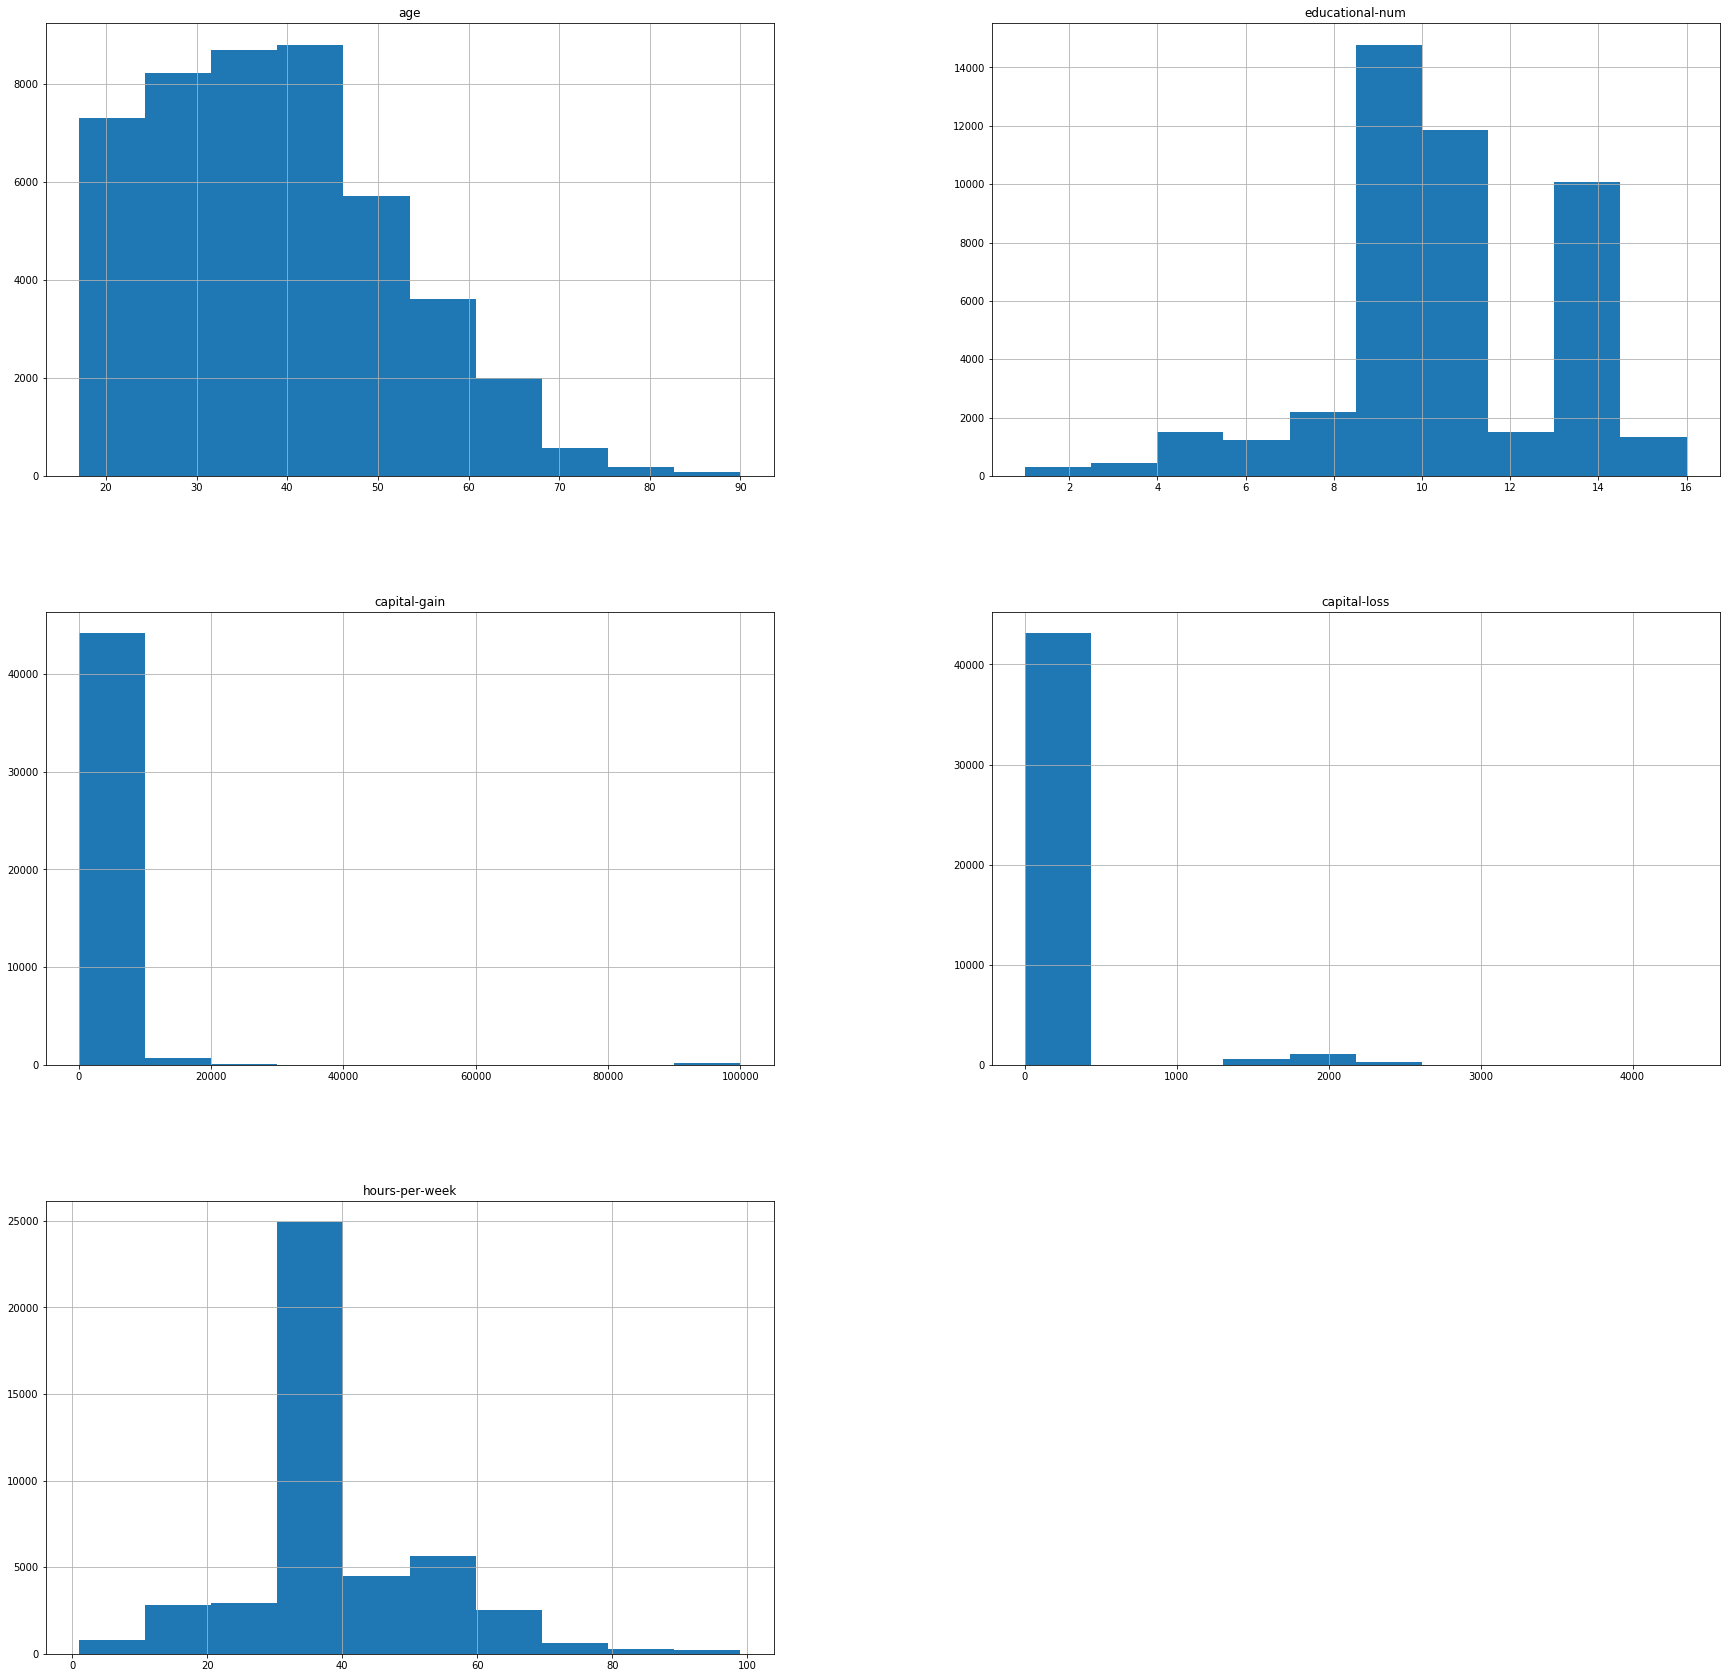

In [23]:
data.hist(figsize=(30,30))

Inference : histogram 

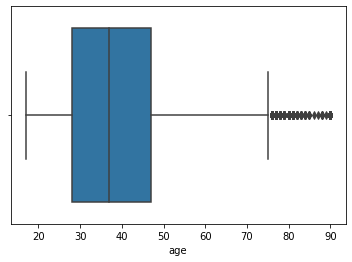

In [24]:
sns.boxplot(data["age"])

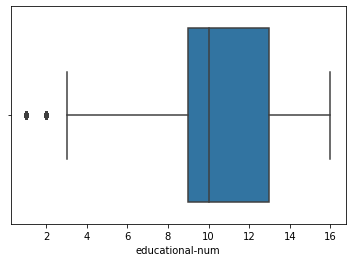

In [25]:
sns.boxplot(data["educational-num"])

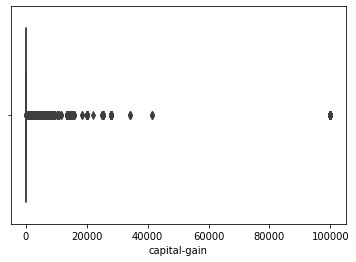

In [26]:
sns.boxplot(data["capital-gain"])

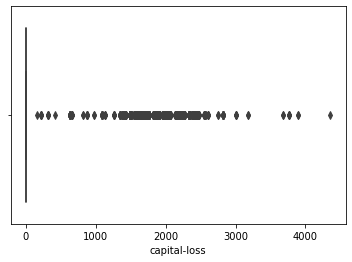

In [27]:
sns.boxplot(data["capital-loss"])

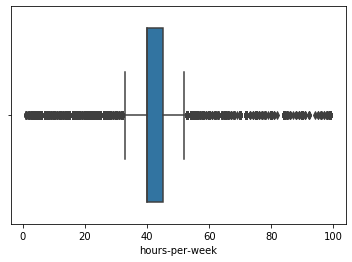

In [28]:
sns.boxplot(data["hours-per-week"])

Inference : 'age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week' these are the features have boxplot

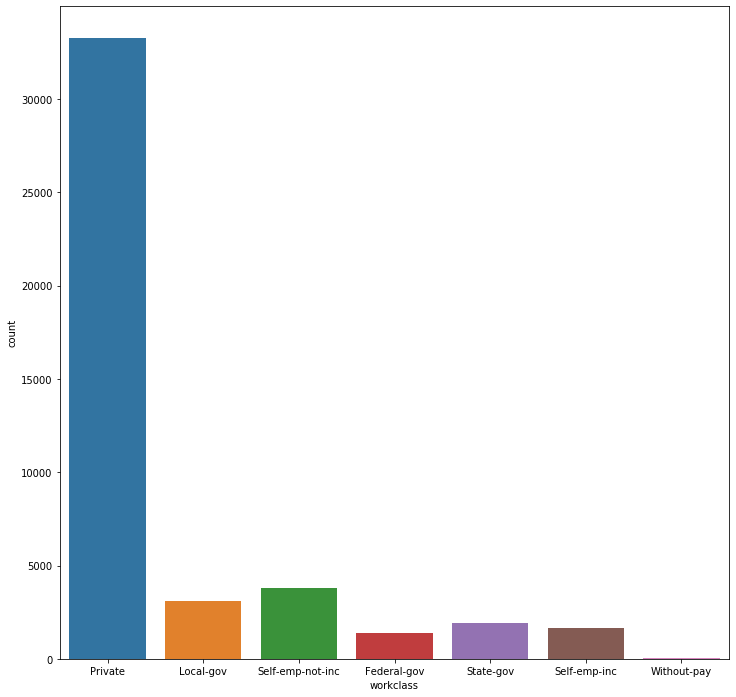

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(data['workclass'])

Inference : there are people in which they have workclass like private, local-gov, self-employee-not-inc, federal-govworkclass, state-gov, self-emp inc, withoutpay 
- private people are more compared to others

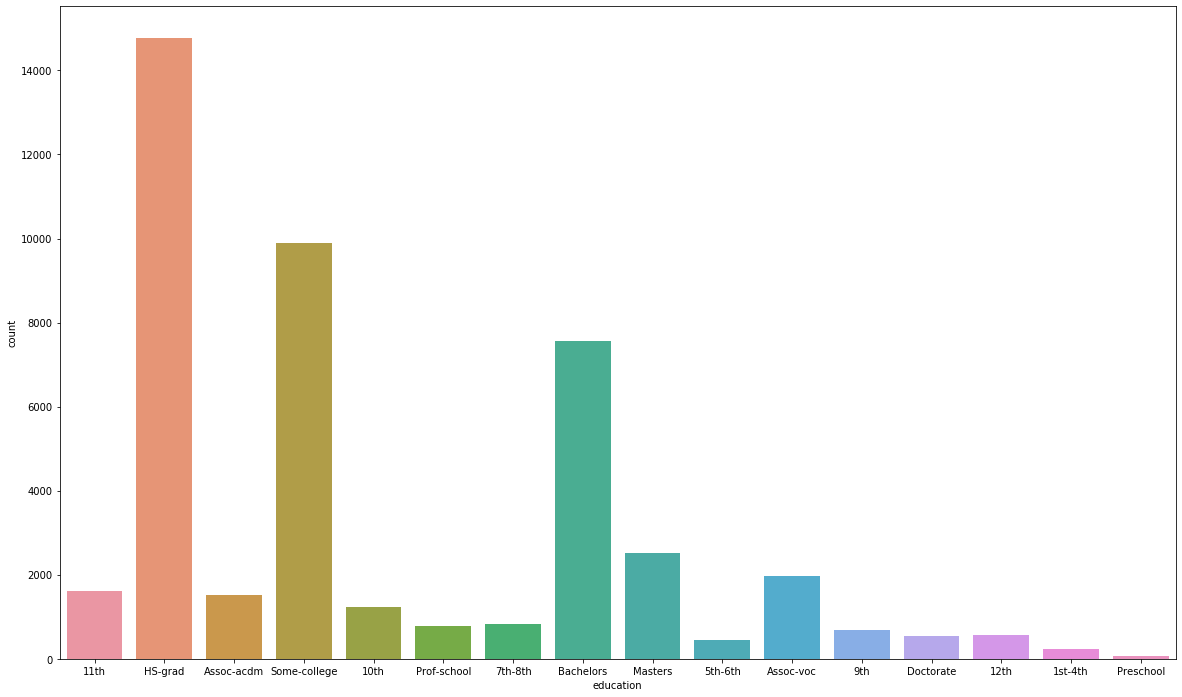

In [37]:
plt.figure(figsize=(20,12))
sns.countplot(data['education'])

Inference : The people have the education like '11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'
- High school grads are more compared to others.

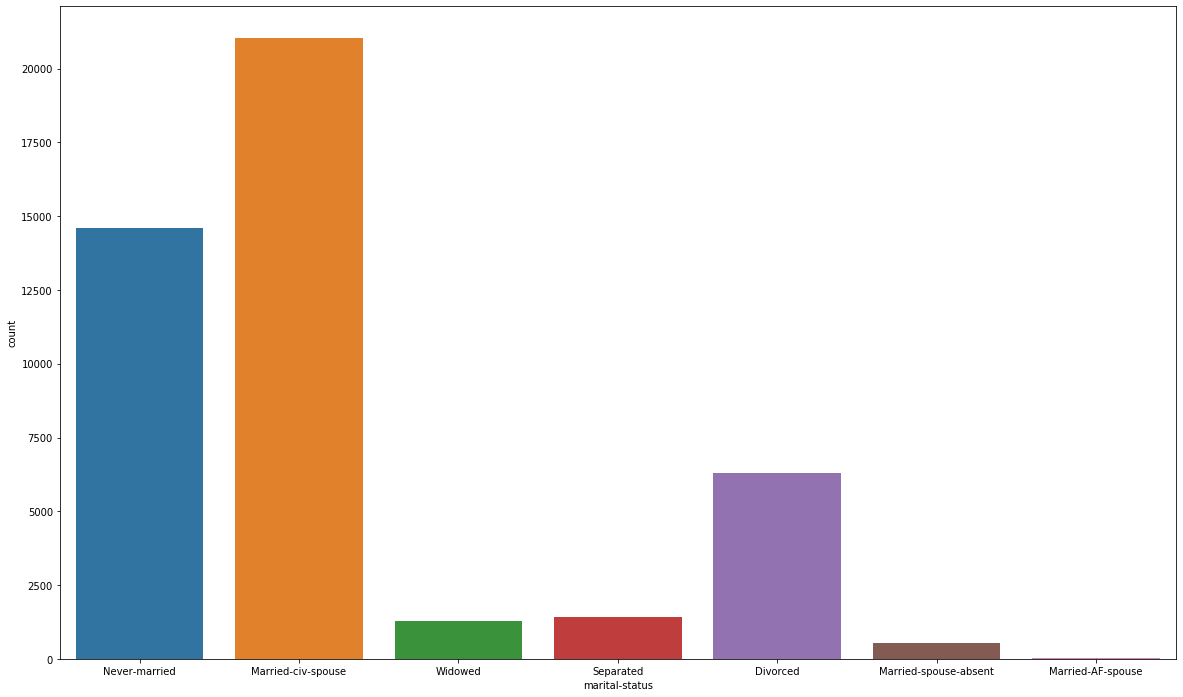

In [38]:
plt.figure(figsize=(20,12))
sns.countplot(data["marital-status"])

Infernce : Married people are more compared to others

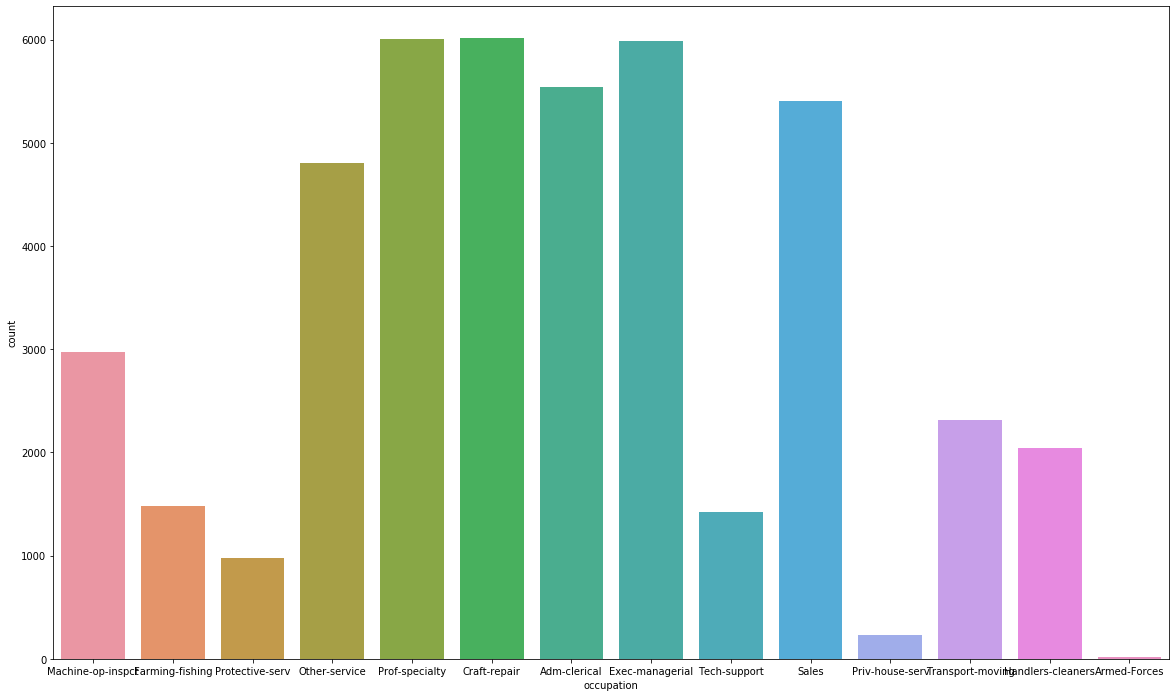

In [41]:
plt.figure(figsize=(20,12))
sns.countplot(data["occupation"])

In [70]:
data["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

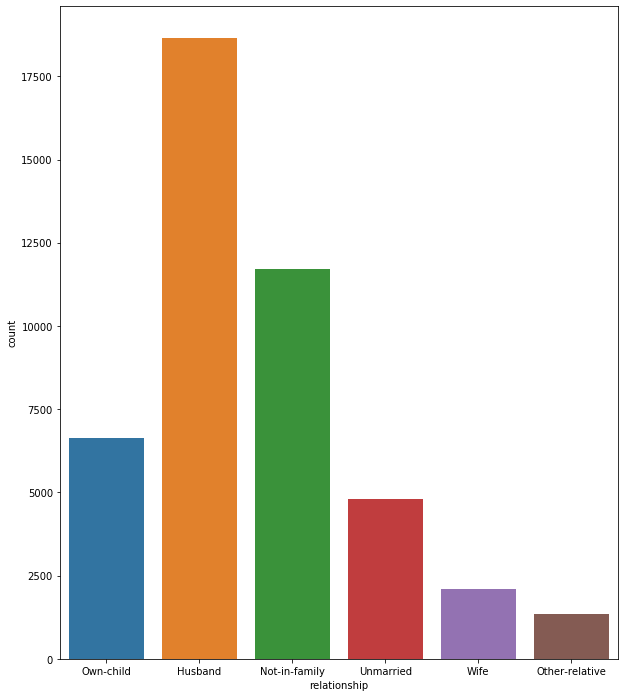

In [43]:
plt.figure(figsize=(10,12))
sns.countplot(data["relationship"])

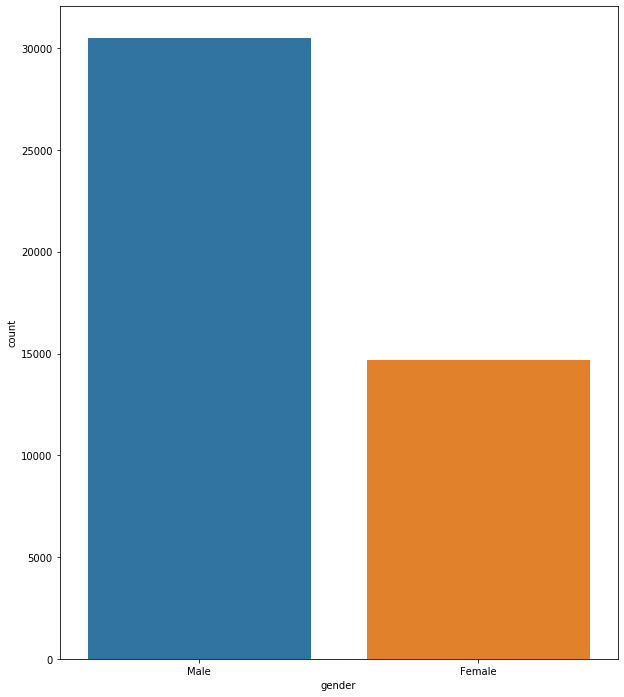

In [45]:
plt.figure(figsize=(10,12))
sns.countplot(data["gender"])

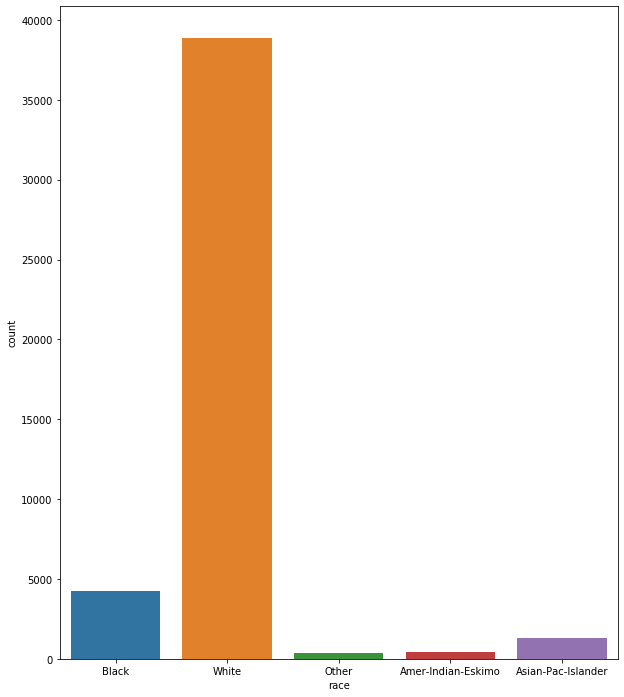

In [47]:
plt.figure(figsize=(10,12))
sns.countplot(data["race"])

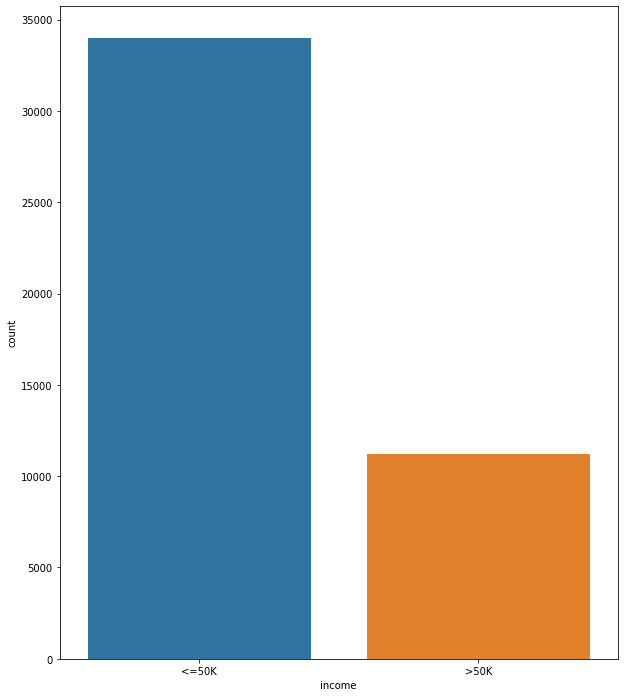

In [51]:
plt.figure(figsize=(10,12))
sns.countplot(data["income"])

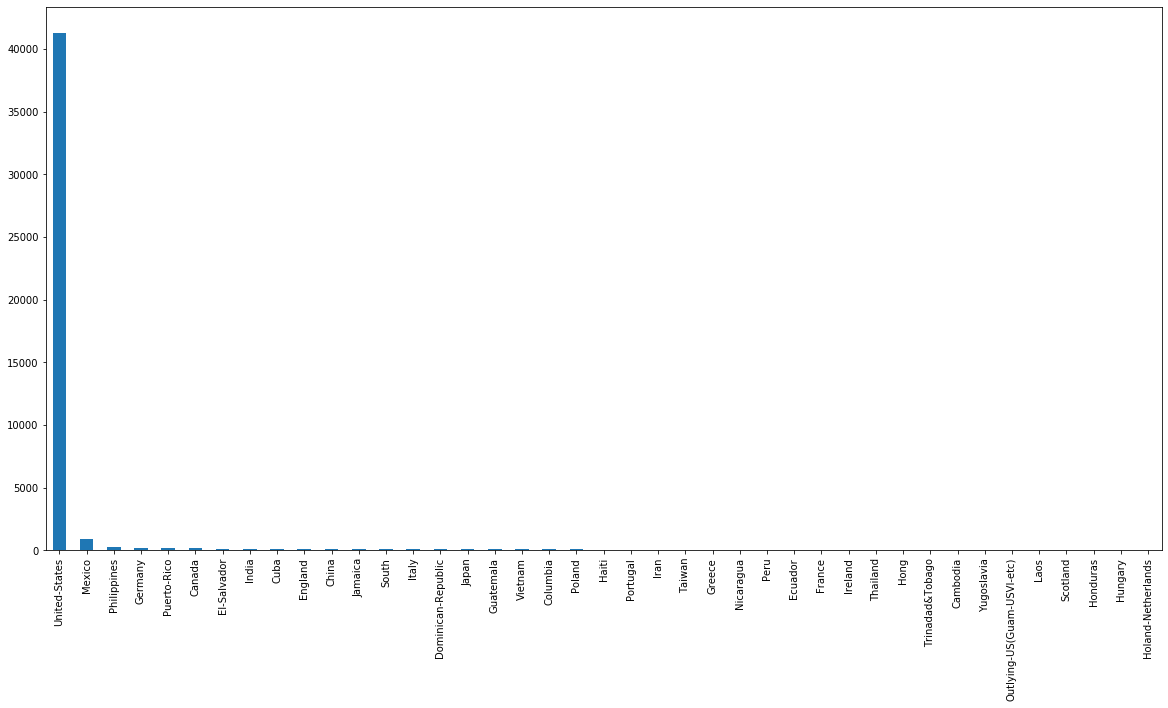

In [53]:
natcou = data['native-country'].value_counts()
natcou.plot(kind="bar",figsize=(20,10))

Inference : People are mostly from United States

In [57]:
num_features.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [58]:
cat_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

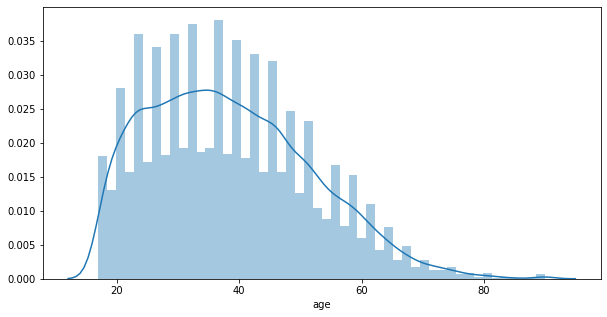

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(data["age"])

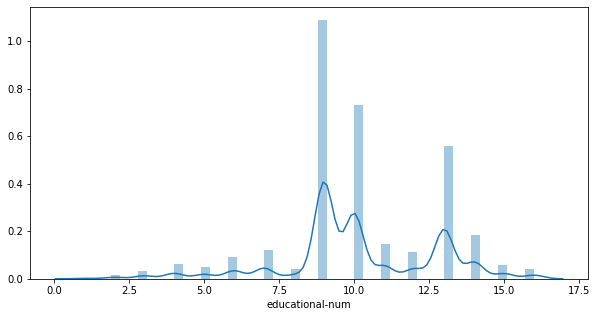

In [60]:
plt.figure(figsize=(10,5))
sns.distplot(data["educational-num"])

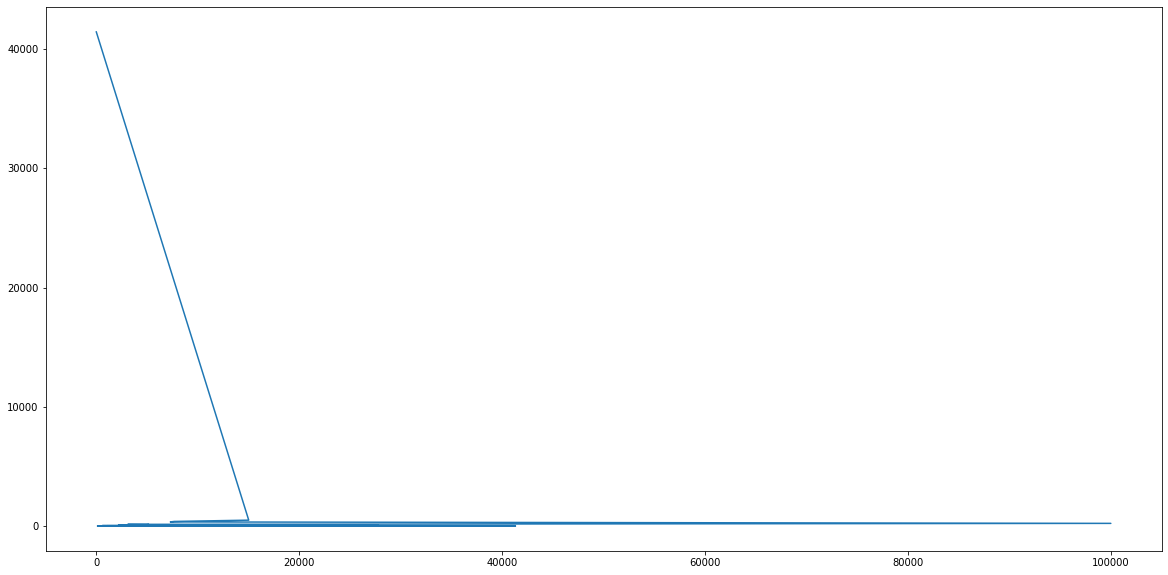

In [63]:
capga = data['capital-gain'].value_counts()
capga.plot(kind="line",figsize=(20,10))

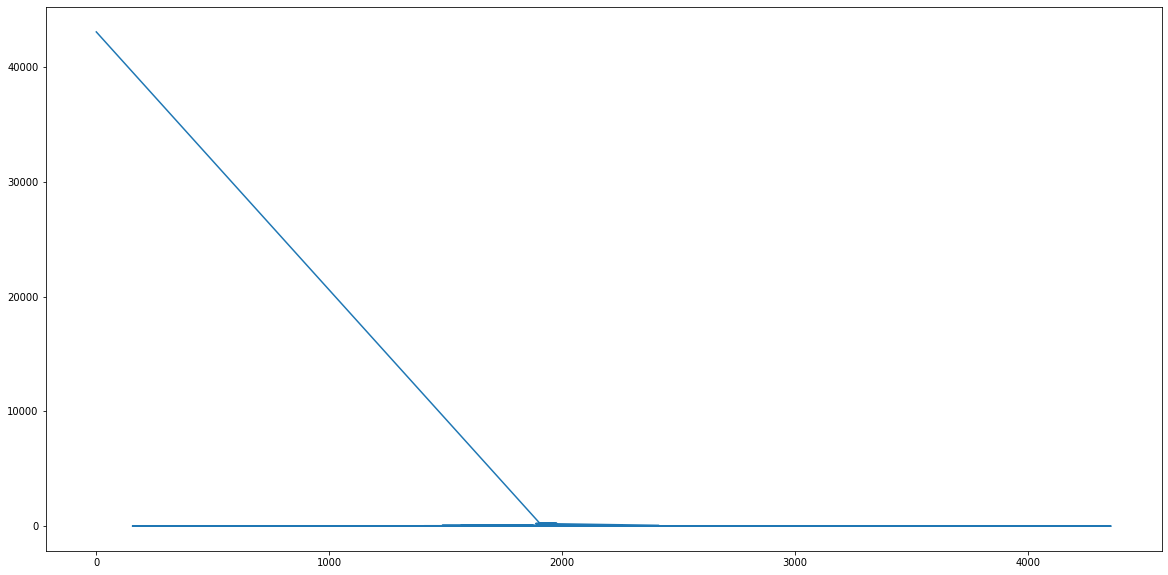

In [65]:
catlo = data['capital-loss'].value_counts()
catlo.plot(kind="line",figsize=(20,10))

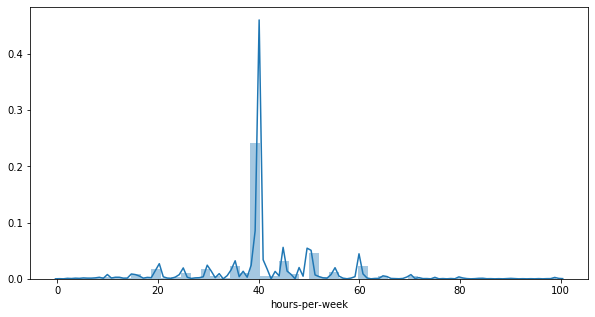

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(data["hours-per-week"])

Inference : There are distplot present there , some are normally distributed

## Step - 4 - Bivariate Analysis

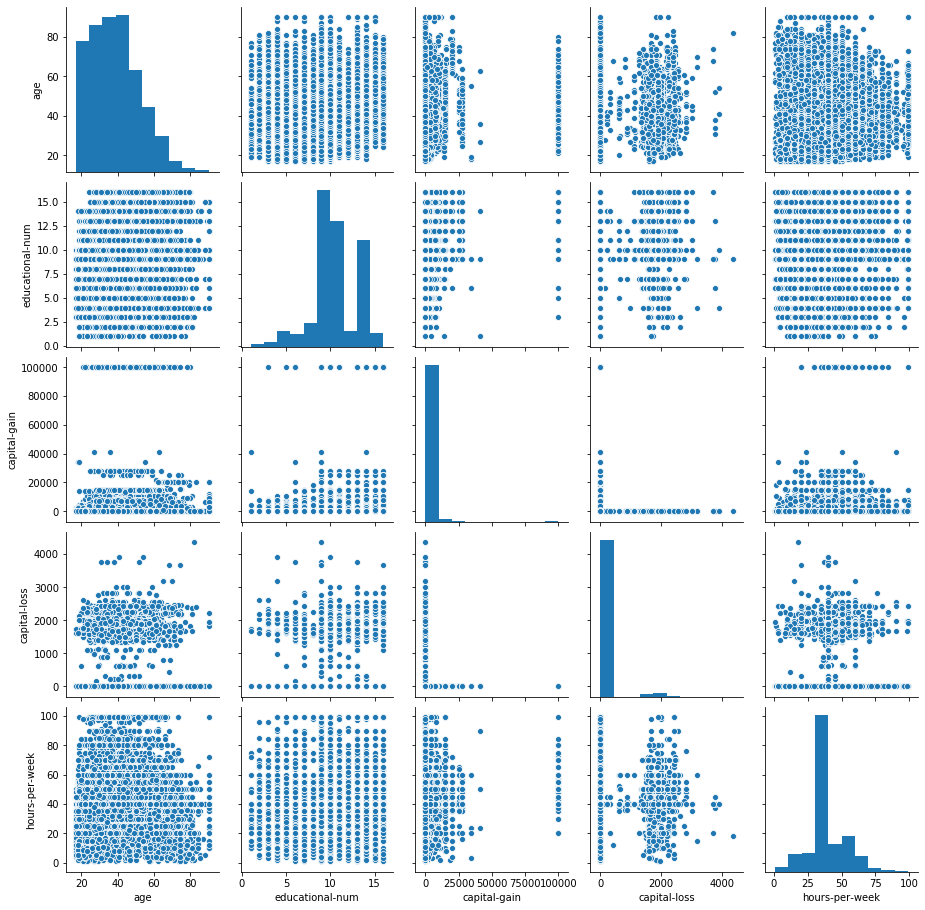

In [76]:
sns.pairplot(data)

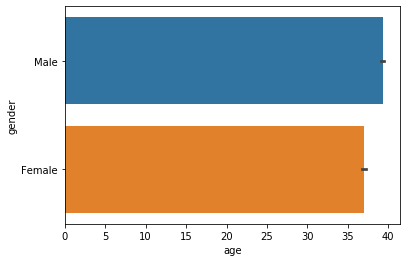

In [77]:
sns.barplot(data['age'],data['gender'])

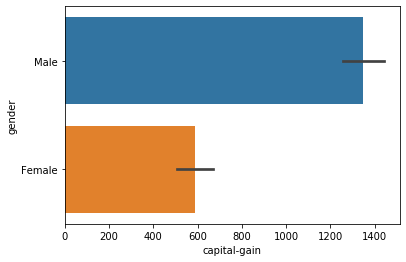

In [79]:
sns.barplot(data['capital-gain'],data['gender'])

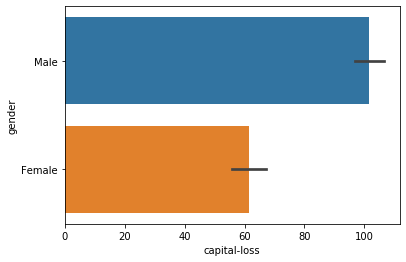

In [80]:
sns.barplot(data['capital-loss'],data['gender'])

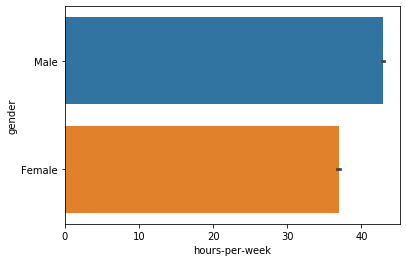

In [81]:
sns.barplot(data['hours-per-week'],data['gender'])

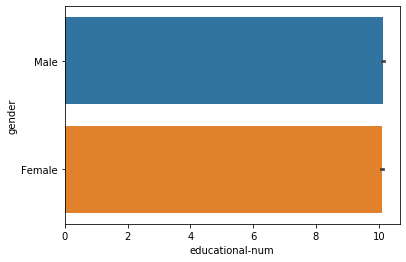

In [83]:
sns.barplot(data['educational-num'],data['gender'])

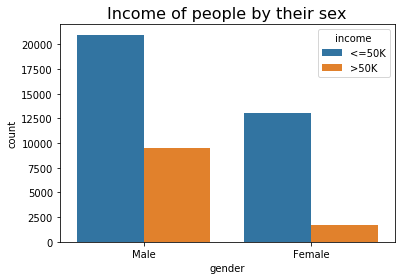

In [88]:
plt.title("Income of people by their sex", fontsize = 16)
sns.countplot(x = data['gender'], hue = data['income'])
plt.show();

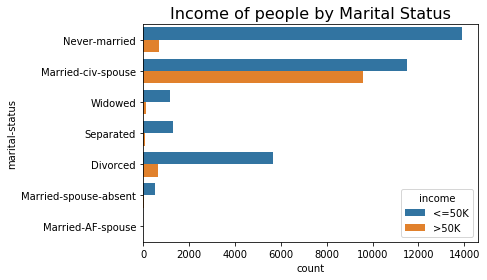

In [89]:
plt.title("Income of people by Marital Status", fontsize = 16)
sns.countplot(y = data['marital-status'], hue = data['income'])
plt.show();

In [92]:
data.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [94]:
cat_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features_le = cat_features.apply(LabelEncoder().fit_transform)

cat_features_le.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,2,1,4,6,3,2,1,38,0
1,2,11,2,4,0,4,1,38,0
2,1,7,2,10,0,4,1,38,1
3,2,15,2,6,0,2,1,38,1
5,2,0,4,7,1,4,1,38,0


In [96]:
New_data = pd.concat([cat_features_le,num_features], axis=1, join='inner')

In [98]:
New_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,educational-num,capital-gain,capital-loss,hours-per-week
0,2,1,4,6,3,2,1,38,0,25,7,0,0,40
1,2,11,2,4,0,4,1,38,0,38,9,0,0,50
2,1,7,2,10,0,4,1,38,1,28,12,0,0,40
3,2,15,2,6,0,2,1,38,1,44,10,7688,0,40
5,2,0,4,7,1,4,1,38,0,34,6,0,0,30


In [100]:
New_data.dtypes

workclass          int32
education          int32
marital-status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
native-country     int32
income             int32
age                int64
educational-num    int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

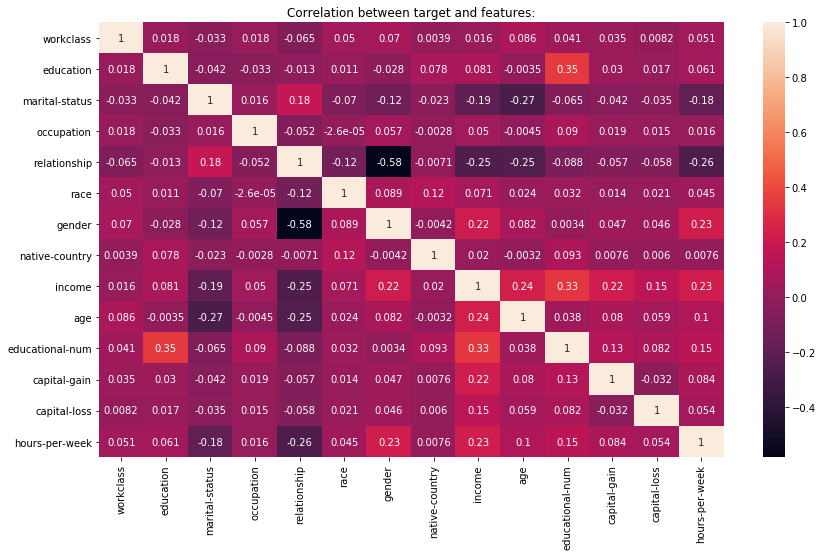

In [101]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(New_data.corr(), annot = True)
plt.show()

In [115]:
New_data.skew()

workclass          1.240261
education         -1.074849
marital-status    -0.035582
occupation         0.195769
relationship       0.845028
race              -2.366932
gender            -0.731643
native-country    -4.510277
income             1.397157
age                0.426058
educational-num    0.258635
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.893979
dtype: float64

In [116]:
New_data.kurt()

workclass           3.056045
education           1.530793
marital-status     -0.656232
occupation         -1.245750
relationship       -0.684817
race                4.578640
gender             -1.464803
native-country     20.418005
income             -0.047957
age                -0.555660
educational-num    -0.103609
capital-gain        0.000000
capital-loss        0.000000
hours-per-week      0.498017
dtype: float64

## Step - 5 - In the above steps you might have encountered many missing values and outliers

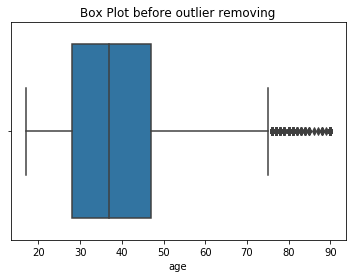

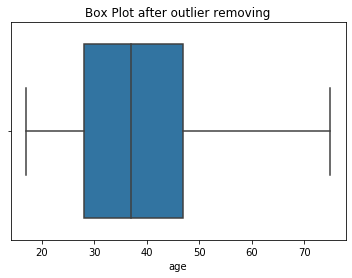

In [104]:
# Handling Outliers

sns.boxplot(New_data['age'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(New_data, field_name):
    iqr = 1.5 * (np.percentile(New_data[field_name], 75) - np.percentile(New_data[field_name], 25))
    New_data.drop(New_data[New_data[field_name] > (iqr + np.percentile(New_data[field_name], 75))].index, inplace=True)
    New_data.drop(New_data[New_data[field_name] < (np.percentile(New_data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(New_data, 'age')
sns.boxplot(New_data['age'])
plt.title("Box Plot after outlier removing")
plt.show()

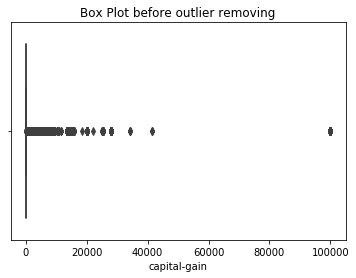

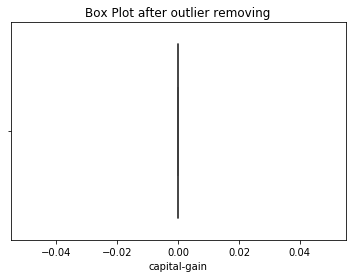

In [105]:
sns.boxplot(New_data["capital-gain"])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(New_data, field_name):
    iqr = 1.5 * (np.percentile(New_data[field_name], 75) - np.percentile(New_data[field_name], 25))
    New_data.drop(New_data[New_data[field_name] > (iqr + np.percentile(New_data[field_name], 75))].index, inplace=True)
    New_data.drop(New_data[New_data[field_name] < (np.percentile(New_data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(New_data, 'capital-gain')
sns.boxplot(New_data['capital-gain'])
plt.title("Box Plot after outlier removing")
plt.show()

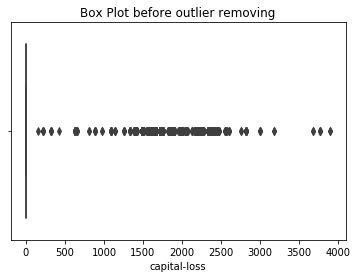

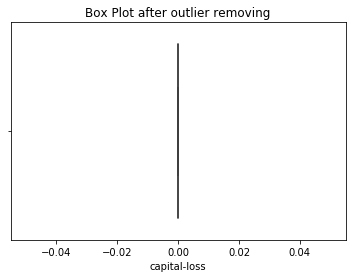

In [106]:
sns.boxplot(New_data["capital-loss"])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(New_data, field_name):
    iqr = 1.5 * (np.percentile(New_data[field_name], 75) - np.percentile(New_data[field_name], 25))
    New_data.drop(New_data[New_data[field_name] > (iqr + np.percentile(New_data[field_name], 75))].index, inplace=True)
    New_data.drop(New_data[New_data[field_name] < (np.percentile(New_data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(New_data, 'capital-loss')
sns.boxplot(New_data['capital-loss'])
plt.title("Box Plot after outlier removing")
plt.show()

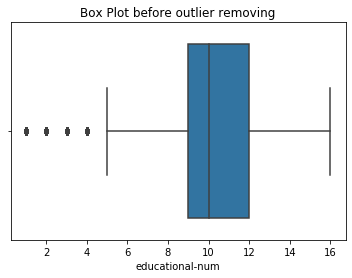

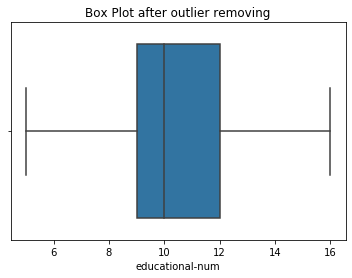

In [107]:
sns.boxplot(New_data["educational-num"])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(New_data, field_name):
    iqr = 1.5 * (np.percentile(New_data[field_name], 75) - np.percentile(New_data[field_name], 25))
    New_data.drop(New_data[New_data[field_name] > (iqr + np.percentile(New_data[field_name], 75))].index, inplace=True)
    New_data.drop(New_data[New_data[field_name] < (np.percentile(New_data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(New_data, "educational-num")
sns.boxplot(New_data['educational-num'])
plt.title("Box Plot after outlier removing")
plt.show()

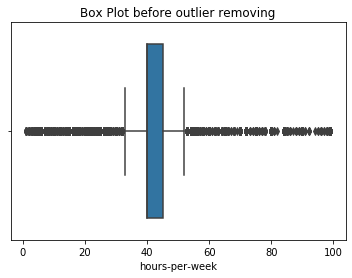

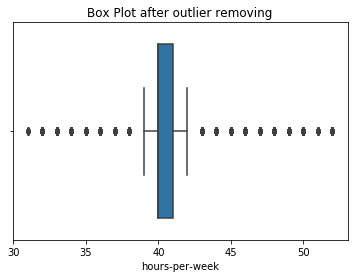

In [108]:
sns.boxplot(New_data["hours-per-week"])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(New_data, field_name):
    iqr = 1.5 * (np.percentile(New_data[field_name], 75) - np.percentile(New_data[field_name], 25))
    New_data.drop(New_data[New_data[field_name] > (iqr + np.percentile(New_data[field_name], 75))].index, inplace=True)
    New_data.drop(New_data[New_data[field_name] < (np.percentile(New_data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(New_data, "hours-per-week")
sns.boxplot(New_data['hours-per-week'])
plt.title("Box Plot after outlier removing")
plt.show()

## Step - 6 - Conclusion of EDA
- We done with nan values
- we done with cutting outliers
- we done with eda part in each column

## Step 7 - Perform feature transformation
- we done already feature transformation

## Step - 8 - Build various Machine Learning models considering ‘income’ as target variable.
## Step - 9 - Create a table to compare the performance of each of the ML Model.

In [110]:
x = New_data.drop('income', axis=1)
y = New_data['income']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.linear_model import LogisticRegression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [117]:
X_train.shape

(22472, 13)

In [118]:
X_test.shape

(5618, 13)

In [119]:
y_train.shape

(22472,)

In [120]:
y_test.shape

(5618,)

### Logistic Regression

In [121]:
#import Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

#Printing the slope(Intercept),Coefficient
print(lr.intercept_)
print(lr.coef_)

[-1.3936038]
[[-1.89374575e-01 -1.27069168e-02 -2.57085575e-01 -3.91607337e-04
  -2.72298373e-01 -3.85431928e-02  1.13785082e+00 -3.34931804e-02
   2.43117725e-02  2.78920554e-01  0.00000000e+00  0.00000000e+00
  -4.45886674e-02]]


In [122]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
ypred1 = lr.predict(X_test)
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
model_score1 = lr.score(X_test,y_test)
model_score1

0.8097187611249556

In [125]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [126]:
metrics.confusion_matrix(y_test,ypred1)

array([[4167,  218],
       [ 851,  382]], dtype=int64)

In [127]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4385
           1       0.64      0.31      0.42      1233

    accuracy                           0.81      5618
   macro avg       0.73      0.63      0.65      5618
weighted avg       0.79      0.81      0.78      5618



In [128]:
print(confusion_matrix(y_test,ypred1))
print('\n')
print(classification_report(y_test,ypred1))
print('\n')
print(accuracy_score(y_test,ypred1))

[[4167  218]
 [ 851  382]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4385
           1       0.64      0.31      0.42      1233

    accuracy                           0.81      5618
   macro avg       0.73      0.63      0.65      5618
weighted avg       0.79      0.81      0.78      5618



0.8097187611249556


 So the Model Accuracy is 0.80 with the help of Logistic Regression.

### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dt = DecisionTreeClassifier()

In [132]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
y_predict2 = dt.predict(X_test)
y_predict2

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
model_score2 = dt.score(X_test,y_test)
model_score2

0.7897828408686365

In [135]:
print(confusion_matrix(y_test,y_predict2))
print('\n')
print(classification_report(y_test,y_predict2))
print('\n')
print(accuracy_score(y_test,y_predict2))

[[3841  544]
 [ 637  596]]


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4385
           1       0.52      0.48      0.50      1233

    accuracy                           0.79      5618
   macro avg       0.69      0.68      0.68      5618
weighted avg       0.78      0.79      0.79      5618



0.7897828408686365


In [137]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dt,x,y,cv=50,scoring='accuracy').mean())

0.7896428594084025


 So the Model Accuracy is 0.78 with the help of Decision Tree.

### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc = RandomForestClassifier()

In [141]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
y_predict3 = rfc.predict(X_test)
y_predict3

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
model_score3 = rfc.score(X_test,y_test)
model_score3

0.8168387326450695

In [144]:
print(confusion_matrix(y_test,y_predict3))
print('\n')
print(classification_report(y_test,y_predict3))
print('\n')
print(accuracy_score(y_test,y_predict3))

[[3971  414]
 [ 615  618]]


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4385
           1       0.60      0.50      0.55      1233

    accuracy                           0.82      5618
   macro avg       0.73      0.70      0.72      5618
weighted avg       0.81      0.82      0.81      5618



0.8168387326450695


 So the Model Accuracy is 0.81 with the help of Random Forest .

### Support Vector Machine - Classification (SVC)

In [146]:
from sklearn.svm import SVC

In [147]:
svc = SVC()

In [148]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
model_score4 = svc.score(X_test,y_test)
model_score4

0.7853328586685653

In [149]:
y_predict4 = svc.predict(X_test)
y_predict4

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
print(confusion_matrix(y_test,y_predict4))
print('\n')
print(classification_report(y_test,y_predict4))
print('\n')
print(accuracy_score(y_test,y_predict4))

[[4380    5]
 [1201   32]]


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4385
           1       0.86      0.03      0.05      1233

    accuracy                           0.79      5618
   macro avg       0.82      0.51      0.46      5618
weighted avg       0.80      0.79      0.70      5618



0.7853328586685653


 So the Model Accuracy is 0.78 with the help of SVC.

### Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [152]:
model5.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
y_pred5 = model5.predict(X_test)
y_pred5

array([0, 1, 0, ..., 0, 1, 0])

In [154]:
model_score5 = model5.score(X_test,y_test)
model_score5

0.7817728729085084

In [155]:
print(confusion_matrix(y_test,y_pred5))
print('\n')
print(classification_report(y_test,y_pred5))
print('\n')
print(accuracy_score(y_test,y_pred5))

[[3570  815]
 [ 411  822]]


              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4385
           1       0.50      0.67      0.57      1233

    accuracy                           0.78      5618
   macro avg       0.70      0.74      0.71      5618
weighted avg       0.81      0.78      0.79      5618



0.7817728729085084


So the Model Accuracy is 0.78 with the help of Naive Bayes.

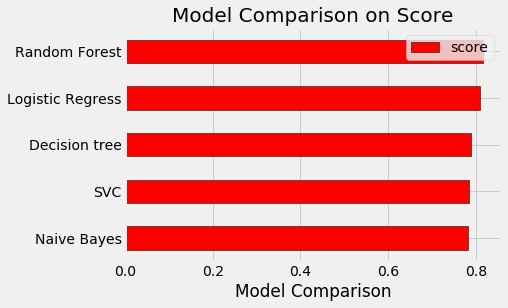

In [161]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regress', 'Decision tree',
                                           'Random Forest',"SVC","Naive Bayes"],
                                 'score': [model_score1, model_score2, model_score3, 
                                         model_score4, model_score5]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Model Comparison'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);